Enter the ticker of the first company (e.g., AAPL): JNJ
Enter the ticker of the second company (e.g., MSFT): MRK
Fetching data for JNJ and MRK...

Market Cap of JNJ: $342,532,128,768.00
Market Cap of MRK: $252,584,542,208.00
Combined Market Cap (Post-Merger): $595,116,670,976.00

Stock Price Trend Analysis:
JNJ: Slope = 0.01, R² = 0.01
MRK: Slope = -0.11, R² = 0.60

Merger Decision:
JNJ shows positive growth, but MRK shows a negative trend. Merger may require caution.
Combined Market Cap (Post-Merger): $595,116,670,976.00
The merger does not immediately indicate an increase in market capitalization.


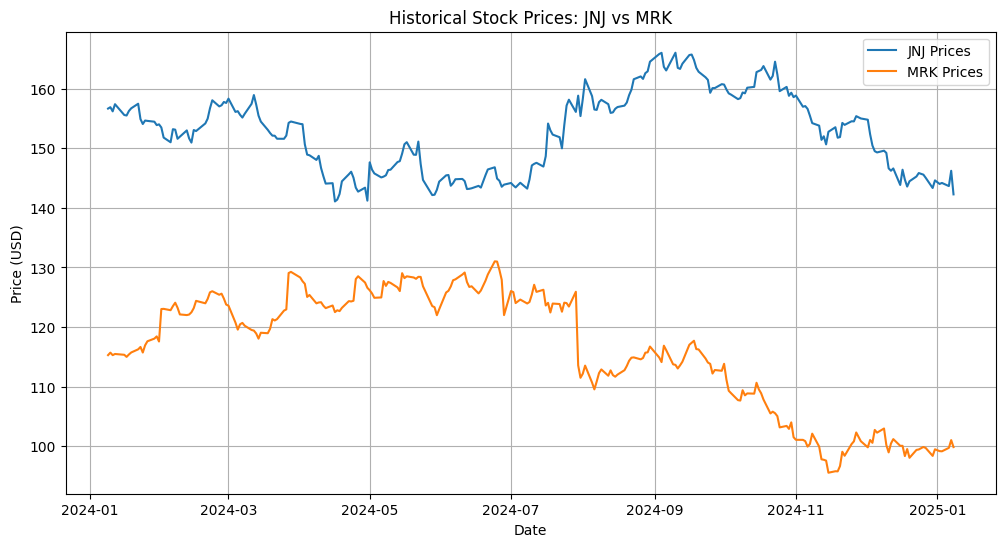

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def fetch_market_cap(ticker):
    """
    Fetching the market capitalization of a given company using its ticker.
    """
    try:
        stock = yf.Ticker(ticker)
        market_cap = stock.info.get("marketCap")
        if market_cap:
            return market_cap
        else:
            print(f"Market cap not available for {ticker}.")
            return 0
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return 0

def fetch_stock_prices(ticker, period="1y"):
    """
    Fetching historical stock prices for the given ticker.
    """
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(period=period)
        return hist['Close']
    except Exception as e:
        print(f"Error fetching stock prices for {ticker}: {e}")
        return pd.Series()

def analyze_stock_trend(prices):
    """
    Analyzing the trend of stock prices using linear regression.
    """
    if prices.empty:
        print("No price data available for trend analysis.")
        return None, None

    x = range(len(prices))
    slope, intercept, r_value, p_value, std_err = linregress(x, prices)
    return slope, r_value**2

def plot_stock_prices(prices1, prices2, ticker1, ticker2):
    """
    Plotting historical stock prices for two tickers.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(prices1, label=f"{ticker1} Prices")
    plt.plot(prices2, label=f"{ticker2} Prices")
    plt.title(f"Historical Stock Prices: {ticker1} vs {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

def make_merger_decision(ticker1, cap1, slope1, r2_1, ticker2, cap2, slope2, r2_2, combined_cap):
    """
    Making a decision on whether the merger is favorable.
    """
    print("\nMerger Decision:")
    smaller_cap = min(cap1, cap2)
    larger_cap = max(cap1, cap2)

    if smaller_cap / larger_cap < 0.01:  # Where small company contributes <1% of larger company's cap
        print("The smaller company's market cap contribution is negligible. Merger may not be favorable.")
        return

    if slope1 > 0 and slope2 > 0:
        print("Both companies show positive stock trends. Merger may be favorable.")
    elif slope1 < 0 and slope2 < 0:
        print("Both companies show negative stock trends. Merger may not be favorable.")
    elif slope1 > 0 and slope2 < 0:
        print(f"{ticker1} shows positive growth, but {ticker2} shows a negative trend. Merger may require caution.")
    elif slope1 < 0 and slope2 > 0:
        print(f"{ticker2} shows positive growth, but {ticker1} shows a negative trend. Merger may require caution.")
    else:
        print("Stock trends are inconclusive. Further analysis needed.")

    # Combined cap comparison
    print(f"Combined Market Cap (Post-Merger): ${combined_cap:,.2f}")
    if combined_cap > cap1 + cap2:
        print("The merger may result in an increase in overall market capitalization.")
    else:
        print("The merger does not immediately indicate an increase in market capitalization.")

def analyze_merger(ticker1, ticker2):
    """
    Analyzing whether a merger between two companies increases market cap
    and evaluates stock trends.
    """
    print(f"Fetching data for {ticker1} and {ticker2}...")
    cap1 = fetch_market_cap(ticker1)
    cap2 = fetch_market_cap(ticker2)

    if cap1 == 0 or cap2 == 0:
        print("Unable to fetch market cap for one or both companies.")
        return

    prices1 = fetch_stock_prices(ticker1)
    prices2 = fetch_stock_prices(ticker2)

    slope1, r2_1 = analyze_stock_trend(prices1)
    slope2, r2_2 = analyze_stock_trend(prices2)

    print(f"\nMarket Cap of {ticker1}: ${cap1:,.2f}")
    print(f"Market Cap of {ticker2}: ${cap2:,.2f}")
    combined_cap = cap1 + cap2
    print(f"Combined Market Cap (Post-Merger): ${combined_cap:,.2f}")

    # Analyzing stock trends
    print("\nStock Price Trend Analysis:")
    print(f"{ticker1}: Slope = {slope1:.2f}, R² = {r2_1:.2f}")
    print(f"{ticker2}: Slope = {slope2:.2f}, R² = {r2_2:.2f}")

    # Making merger decision
    make_merger_decision(ticker1, cap1, slope1, r2_1, ticker2, cap2, slope2, r2_2, combined_cap)

    plot_stock_prices(prices1, prices2, ticker1, ticker2)

if __name__ == "__main__":
    ticker1 = input("Enter the ticker of the first company (e.g., AAPL): ").strip().upper()
    ticker2 = input("Enter the ticker of the second company (e.g., MSFT): ").strip().upper()

    analyze_merger(ticker1, ticker2)
